# Предсказание ротамеров угла $\chi_1$ в зависимости от окружения

In [ ]:
import json
import pandas as pd
import numpy as np

## Запустите следующую клетку. Будет случайно выбрана аминокислота, для которой вы будете проводить исследование

In [ ]:
amacid_names = ['ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'HIS', 'ILE', 'LEU',
                'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']

print(f"Моя аминокислота - {np.random.choice(amacid_names)}")

Моя аминокислота - PHE


Что ж, не ты выбираешь АК, а АК выбирает тебя, фе (PHE)

## Загрузите <a href="https://yadi.sk/d/FeLl5KYfjbhHgA?w=1">отсюда</a> соответствующий файл. Далее мы будем работать с ним.

# Часть 1. Анализ значений угла $\chi_1$

## Задание 1.1. Откроем загруженный файл. Посмотрим на колонки:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dpath = '/content/drive/MyDrive/hw_data/PHE_data.csv'

In [ ]:
df = pd.read_csv(dpath)
df.head()

,Unnamed: 0,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,...,gamma14,alpha15,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17
0,0,2BO5,-55.034552,-174.382151,124.231022,106.524078,77,42,-,0,...,30.315651,43.041287,141.005909,110.905784,26.710416,88.282907,71.474569,46.363710,62.360119,98.498472
1,1,2BO5,-60.842823,-34.977047,89.258027,56.708631,104,15,H,0,...,29.735608,82.705709,115.843587,154.118205,71.370218,173.552047,83.657742,43.572820,66.680104,84.894026
2,2,2BW2,-90.189119,-47.708325,96.748545,36.556459,33,106,E,0,...,125.821374,55.700592,105.549625,85.427334,54.756735,12.693020,102.118568,27.112663,30.954919,105.194189
3,3,2BW2,-64.168510,-44.404876,89.375456,49.261166,38,101,H,0,...,52.640227,6.522095,105.602511,83.481004,69.177399,174.319760,88.031767,49.975207,62.838396,113.661697
4,4,2BW2,-120.577613,151.604184,131.954098,-159.224942,57,82,E,0,...,99.405364,87.448695,36.394383,65.357957,116.101973,120.419186,118.371987,20.396780,129.110205,76.636164


Эта таблица содержит информацию о сэмплах одной аминокислоты. Для каждого сэмпла известны:
- Значения всех двугранных углов $\chi$;
- Значения $\phi, \psi, \alpha$ (двугранный угол, построенный по 4 последовательным атомам $C_\alpha$);
- Данные о 17 ближайших пространственных соседях:
    - $\phi, \psi$;
    - Названия аминокислот;
    - Расстояние до целевой аминокислоты по $C_\alpha$;
    - Химические / физикохимические характеристики соседа: группы и точные значения некоторых характеристик;
    - Дополнительные геометрические характеристики (относительно целевой аминокислоты).

## Задание 1.2. Постройте гистограмму значений $\chi_1$ из этой таблицы. Какие ротамеры выделяются на этой гистограмме?

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = df[~np.isnan(df["chi_1"])]

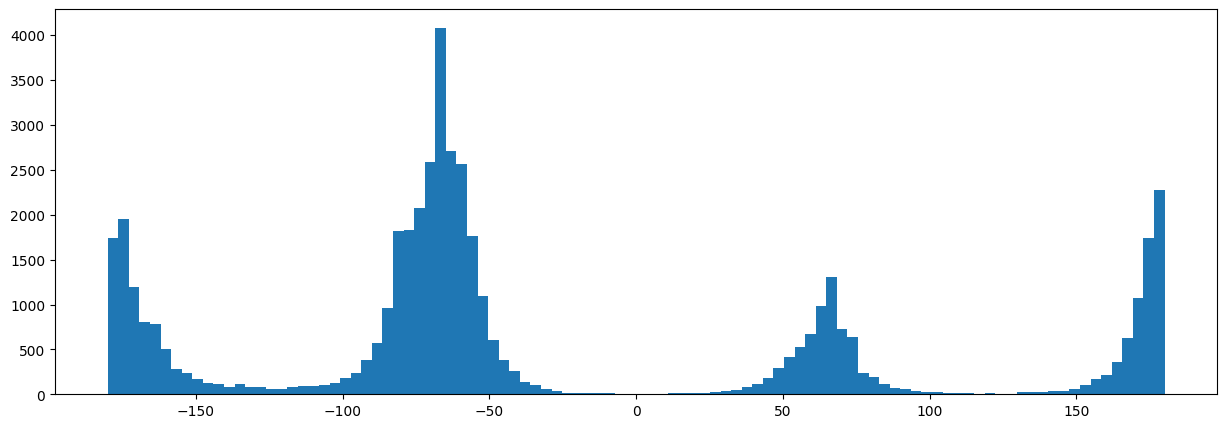

In [ ]:
plt.figure(figsize=(15,5))
hs,xs,*_= plt.hist(df["chi_1"], bins = 100)

plt.show()

Занесите обнаруженные ротамеры в список rotamers:

In [ ]:
xs = (xs[1:] + xs[:-1])/2

In [ ]:
rotamer_inds = [i for i in range(3, len(hs))
                if np.all(hs[i - 3:i] < hs[i]) and np.all(hs[i+1:i+4] < hs[i])]
print(rotamer_inds)

[31, 68, 99]


In [ ]:
xs[rotamer_inds]

array([-66.59716986,  66.60102239, 178.19950778])

In [ ]:
rotamers = xs[rotamer_inds]

In [ ]:
rotamers

array([-66.59716986,  66.60102239, 178.19950778])

## Задание 1.3. Давайте разберемся, как можно дискретизировать значения (разделить их на классы). Реализуйте функцию get_class(value, rotamers), которая возвращает индекс ротамера, к которому относится значение value.

**Комментарий**: стоит вычислять расстояние от value до каждого значения из rotamers. Но не забудьте, что с точки зрения окружности $-\pi$ и $\pi$ - одно и то же!

In [ ]:
def get_class(value, rotamers):
    diffs = np.abs(np.array(rotamers) - value)
    diffs = np.minimum(diffs, 360 - diffs)
    return np.argmin(diffs)

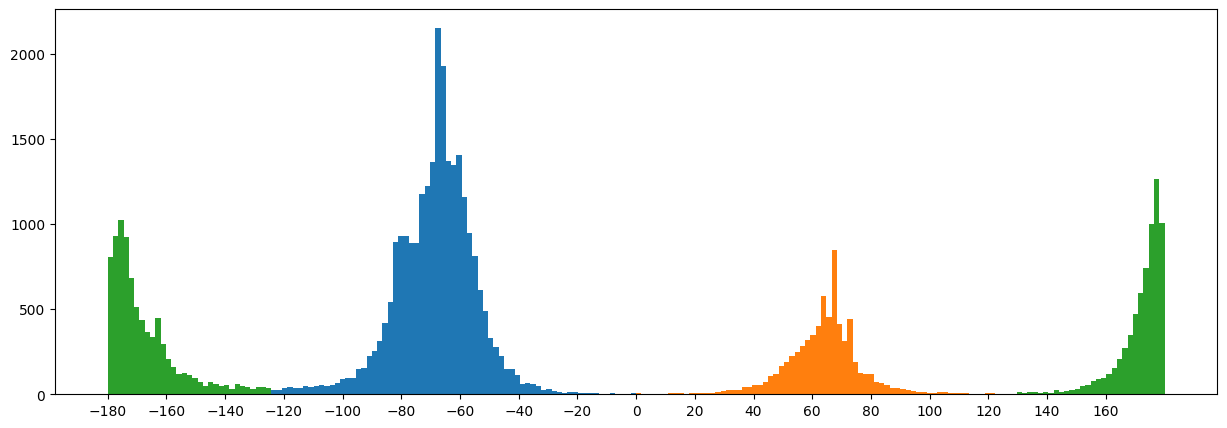

In [ ]:
plt.figure(figsize=(15,5))
classes = [get_class(val, rotamers)
           for val in df["chi_1"]]

for i in np.unique(classes):
    plt.hist(df["chi_1"].values[classes == i],
             bins=200,
             range=(-180, 180))

plt.xticks(np.arange(-180, 180, 20))
plt.show()


## Задание 1.4. Теперь мы умеем делить значения $\chi_1$ на классы, т.е. можем понять, к какому ротамеру относится то или иное значение.
Реализуем первую часть подхода Dunbrack. Шаги:
- Разделить карту Рамачандрана на блоки $20 x 20$. Для каждого блока нужно найти те сэмплы из выборки, которые входят в него.
- Для всех найденных сэмплов нужно получить индексы классов; после этого выбрать класс, встречающийся чаще всего, и сохранить его в соответствующую ячейку матрицы **most_common_rotamers**.
    - Если получилось меньше 10 значений для некоторого блока, нужно получить наиболее частый класс для всей выборки.

In [ ]:
all_rots = [get_class(val, rotamers) for val in df["chi_1"]]
df["rotamer"] = all_rots

all_un_rots, all_un_cnts = np.unique(all_rots, return_counts=True)

most_common = all_un_rots[np.argmax(all_un_cnts)]

In [ ]:
most_common

0

In [ ]:
most_common_rotamers = np.full((18, 18), np.nan)
for phi_ind in range(18):
    phi_st = -180 + 20 * phi_ind
    phi_end = -180 + 20 * (phi_ind + 1)
    for psi_ind in range(18):
        psi_st = -180 + 20 * psi_ind
        psi_end = -180 + 20 * (psi_ind + 1)

        subdf = df[(df["phi"] >= phi_st) & (df["phi"] < phi_end) &
                   (df["psi"] >= psi_st) & (df["psi"] < psi_end)]
        if len(subdf) < 10:
            most_common_rotamers[psi_ind, phi_ind] = -1 # most_common
            continue
        un_rotamers, counts = np.unique(subdf["rotamer"].values,
                                        return_counts=True)
        best_rotamer_ind = np.argmax(counts)
        best_rotamer = un_rotamers[best_rotamer_ind]
        most_common_rotamers[psi_ind, phi_ind] = best_rotamer

Отобразите получившуюся матрицу с помощью plt.imshow:

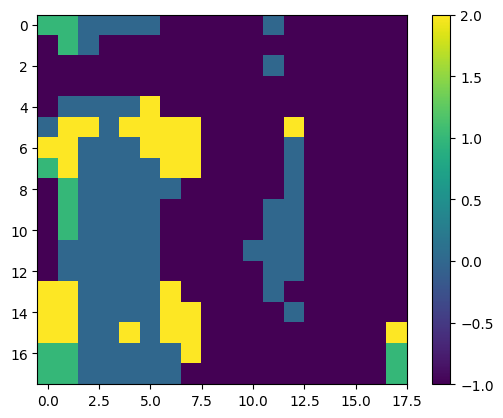

In [ ]:
plt.imshow(most_common_rotamers)

plt.colorbar()
plt.show()

Какие выводы можно сделать на основании изображения выше? Можно ли сказать, что какой-то ротамер характерен для определенной вторичной структуры?

# $\rightarrow$ Ваши идеи 🙂

## Задание 1.5. А насколько вообще состоятелен подход к поиску пересечений, основанный на энергии van der Waals?

Давайте возьмем достаточно длинный белок $1Z87$, откроем его и изучим:

In [ ]:
!pip install Bio

In [ ]:
import Bio.PDB as pdb

In [ ]:
path = pdb.PDBList().retrieve_pdb_file("1z87",
                                       file_format="pdb")
struct = pdb.PDBParser().get_structure("s", path)

Structure exists: '/content/z8/pdb1z87.ent' 


Получите 0-ую цепочку этого белка, найдите в ней индексы всех цистеинов (CYS):

In [ ]:
chain = struct[0].child_list[0]
residues = chain.child_list
cys_inds = [i for i in range(len(residues))
            if residues[i].resname == "CYS"]

In [ ]:
cys_inds

[15, 218, 231]

Выберите первый найденный цистеин. Будем менять для него угол $\chi_1$ и смотреть, как будет меняться энергия ван дер Ваальса при взаимодействии с другими атомами.

$U_{LJ} = 4 \cdot \epsilon \cdot [(\frac{r_{min}}{r})^{12} - 2 \cdot (\frac{r_{min}}{r})^6]$

In [ ]:
lj_coeffs = pd.read_csv("lennard-jones_12-6.csv", delimiter="\t")
lj_coeffs.head()

,atom_pair,reqm,eps
0,C-C,4,"0,15"
1,C-N,"3,75","0,155"
2,C-O,"3,6","0,173"
3,C-S,4,"0,173"
4,C-H,3,"0,055"


In [ ]:
def van_der_Waals(d, d_m, eps):
    return  4 * eps * (((d_m / d) ** 12) - 2 * ((d_m / d) ** 6))

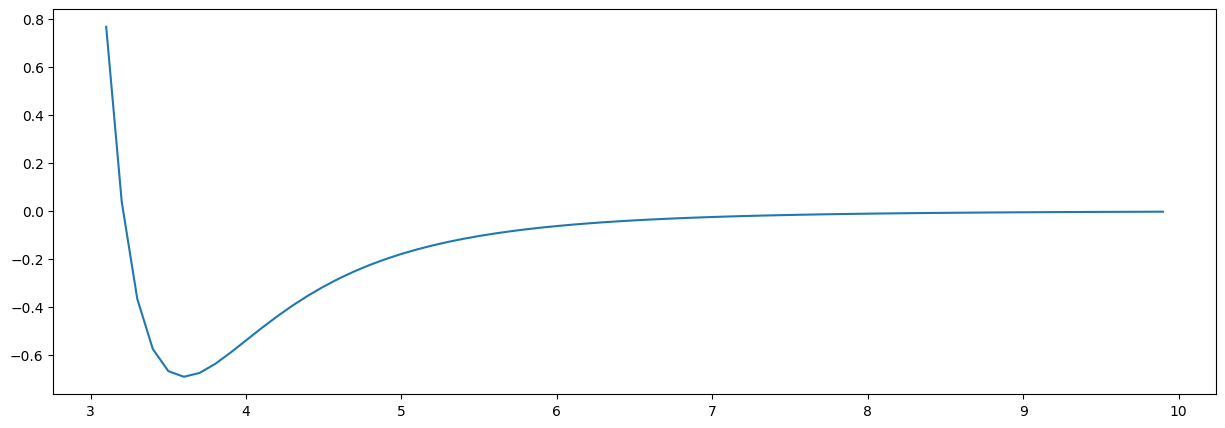

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
xs = np.arange(3.1, 10, 0.1)
plt.plot(xs, van_der_Waals(xs, 3.6, 0.173))
plt.show()

Изменяя двугранный угол в пределах $[-\pi, \pi)$:
- Вычислите новые координаты атома SG у цистеина. Для этого можно воспользоваться функциями из файла geometry.py (из первого ДЗ).
- После получения координат, их можно присвоить с помощью метода:

    residue["CG"].set_coord(new_cg1_coord)
- После этого вычислите суммарную энергию ван дер Ваальса взаимодействия со всеми другими атомами белка.

In [ ]:
from geometry import *

Для удобства сделаем словарь из таблицы с коэффициентами потенциала типа Леннарда-Джонса:

In [ ]:
lj_coeffs = {row[0]: {"d_min": float(row[1].replace(",", ".")),
                      "eps": float(row[2].replace(",", "."))} for row in lj_coeffs.values}
lj_coeffs

{'C-C': {'d_min': 4.0, 'eps': 0.15},
 'C-N': {'d_min': 3.75, 'eps': 0.155},
 'C-O': {'d_min': 3.6, 'eps': 0.173},
 'C-S': {'d_min': 4.0, 'eps': 0.173},
 'C-H': {'d_min': 3.0, 'eps': 0.055},
 'N-C': {'d_min': 3.75, 'eps': 0.155},
 'N-N': {'d_min': 3.5, 'eps': 0.16},
 'N-O': {'d_min': 3.35, 'eps': 0.179},
 'N-S': {'d_min': 3.75, 'eps': 0.179},
 'N-H': {'d_min': 2.75, 'eps': 0.057},
 'O-C': {'d_min': 3.6, 'eps': 0.173},
 'O-N': {'d_min': 3.35, 'eps': 0.179},
 'O-O': {'d_min': 3.2, 'eps': 0.2},
 'O-S': {'d_min': 3.6, 'eps': 0.2},
 'O-H': {'d_min': 2.6, 'eps': 0.063},
 'S-C': {'d_min': 4.0, 'eps': 0.173},
 'S-N': {'d_min': 3.75, 'eps': 0.179},
 'S-O': {'d_min': 3.6, 'eps': 0.2},
 'S-S': {'d_min': 4.0, 'eps': 0.2},
 'S-H': {'d_min': 3.0, 'eps': 0.063},
 'H-C': {'d_min': 3.0, 'eps': 0.055},
 'H-N': {'d_min': 2.75, 'eps': 0.057},
 'H-O': {'d_min': 2.6, 'eps': 0.063},
 'H-S': {'d_min': 3.0, 'eps': 0.063},
 'H-H': {'d_min': 2.0, 'eps': 0.02}}

In [ ]:
def calc_vdw_w_residue(ref_residue, residue):
    ref_atoms = [at
                 for at in ref_residue.child_list
                 if at not in ["C", "N", "CA", "CB", "O"] and at.element[0] != "H"]
    atoms = [at
             for at in residue.child_list
             if at.element[0] != "H"]

    ds, d_ms, epses = [], [], []
    for at1 in ref_atoms:
        for at2 in atoms:
            pair = "{}-{}".format(at1.element, at2.element)
            ds += [at1 - at2]
            d_ms += [lj_coeffs[pair]["d_min"]]
            epses += [lj_coeffs[pair]["eps"]]

    ds =    np.array(ds)
    d_ms =  np.array(d_ms)
    epses = np.array(epses)

    return van_der_Waals(ds, d_ms, epses).sum()


In [ ]:
calc_vdw_w_residue(chain[2], chain[3])

157461.58689638547

In [ ]:
chi1_vals = np.arange(-np.pi, np.pi, np.pi/10)

cys_residue = residues[cys_inds[0]]

chi1_true = pdb.calc_dihedral(cys_residue["N"].get_vector(),
                              cys_residue["CA"].get_vector(),
                              cys_residue["CB"].get_vector(),
                              cys_residue["SG"].get_vector(),
                             )
planar = pdb.calc_angle(cys_residue["CA"].get_vector(),
                      cys_residue["CB"].get_vector(),
                      cys_residue["SG"].get_vector())
bond = cys_residue["SG"] - cys_residue["CB"]
prev_atoms = np.array([cys_residue["N"].coord,
                       cys_residue["CA"].coord,
                       cys_residue["CB"].coord,
                      ])

vdw_vals = []

for chi1 in chi1_vals:
    new_coord = place_next_dihedral_atom(prev_atoms, chi1, planar, bond)
    cys_residue["SG"].set_coord(new_coord)

    # your code here
    chi_vdw_sum = 0
    for i, res in enumerate(chain):
      if i == cys_inds[0]:
        continue
      chi_vdw_sum+=calc_vdw_w_residue(cys_residue,res)

    vdw_vals.append(chi_vdw_sum)

Постройте график для получившихся значений энергии. Какой вывод можно сделать из него?

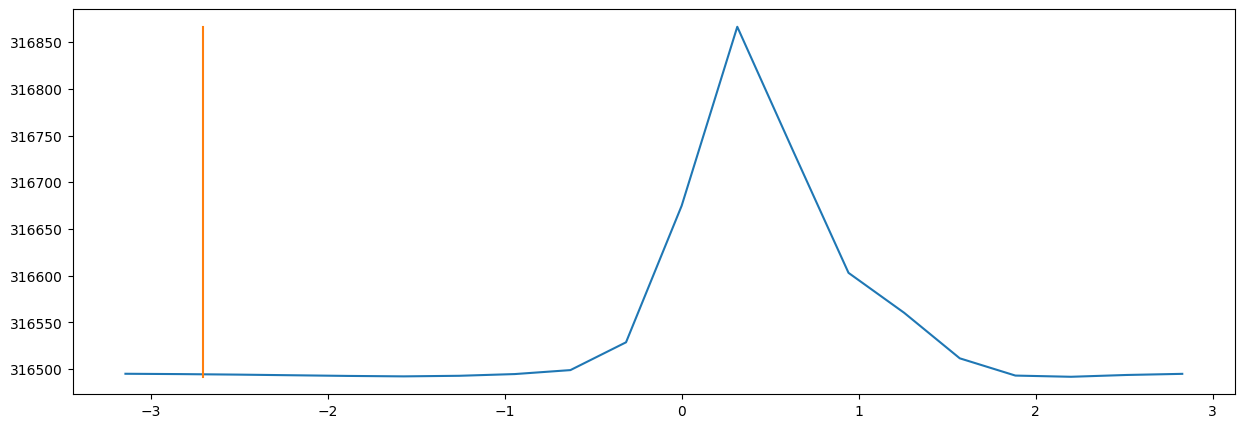

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(chi1_vals, vdw_vals)

plt.plot([chi1_true, chi1_true], [min(vdw_vals), max(vdw_vals)])

plt.show()

# Часть 2. Предсказание ротамеров $\chi_1$

В этой части Вам предстоит применить методы Машинного Обучения (деревья решений) к задаче предсказания ротамеров Вашей аминокислоты.

## Задание 2.1. Вернемся к датасету из части 1. Добавьте колонку chi_class, которая получается преобразованием значений из колонки chi_1 к классам.

In [ ]:
my_df = df.copy()

In [ ]:
my_df["chi_class"] = classes

## Задание 2.2. Теперь давайте дискретизируем значения $\phi, \psi, \alpha$. Каждому значению из $[-\pi, \pi]$ нужно поставить в соответствие номер блока длиной 20 градусов, в который он попадает.

**Комментарий**: обратите внимание, значения могут быть отрицательными. А номер блока нет 🤔

In [ ]:
result_psi = []
result_phi = []
result_alpha = []

for psi in df['psi']:
  for i,r in enumerate(range(-180, 180, 20)):
    if  r <= psi < r + 20:
      result_psi.append(i)

for phi in df['phi']:
  for i,r in enumerate(range(-180, 180, 20)):
    if  r <= phi < r + 20:
      result_phi.append(i)

for alpha in df['alpha']:
  for i,r in enumerate(range(-180, 180, 20)):
    if  r <= alpha < r + 20:
      result_alpha.append(i)

my_df['psi'] = result_psi
my_df['phi'] = result_phi
my_df['alpha'] = result_alpha

In [ ]:
my_df.head()

,Unnamed: 0,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,...,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17,rotamer,chi_class
0,0,2BO5,6,0,124.231022,14,77,42,-,0,...,141.005909,110.905784,26.710416,88.282907,71.474569,46.363710,62.360119,98.498472,0,0
1,1,2BO5,5,7,89.258027,11,104,15,H,0,...,115.843587,154.118205,71.370218,173.552047,83.657742,43.572820,66.680104,84.894026,2,2
2,2,2BW2,4,6,96.748545,10,33,106,E,0,...,105.549625,85.427334,54.756735,12.693020,102.118568,27.112663,30.954919,105.194189,0,0
3,3,2BW2,5,6,89.375456,11,38,101,H,0,...,105.602511,83.481004,69.177399,174.319760,88.031767,49.975207,62.838396,113.661697,2,2
4,4,2BW2,2,16,131.954098,1,57,82,E,0,...,36.394383,65.357957,116.101973,120.419186,118.371987,20.396780,129.110205,76.636164,0,0


## Задание 2.3. В датасете есть текстовые признаки! Так как они категориальные, их значения можно поменять на натуральные числа. Пронумеруйте все уникальные значения таких признаков и измените текстовые значения на соответствующие номера.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for column in my_df:
  if my_df[column].dtypes == 'O':
    print(1)
    encoder = LabelEncoder()
    my_df[column] = encoder.fit_transform(my_df[column])

In [ ]:
for column in my_df.select_dtypes(include=['O']).columns:
    unique_values = my_df[column].unique()
    value_to_number = {value: number for number, value in enumerate(unique_values)}
    my_df[column] = my_df[column].map(value_to_number)

In [ ]:
df['n_10_chemical_group'].dtypes

dtype('O')

In [ ]:
my_df['sec_structure']

0        0
1        4
2        2
3        4
4        2
        ..
47210    2
47211    4
47212    2
47213    0
47214    7
Name: sec_structure, Length: 47108, dtype: int64

## Задание 2.4. Обучим нашу модель!

Импортируйте библиотеку lightgbm. Если она не установлена, установить ее можно с помощью консольной команды pip:

In [ ]:
# Ваш pip может иметь другую версию / называться по-другому: например, pip3 для python3
! pip install lightgbm
import lightgbm as lgb

Разделите выборку на обучающую и тестовую в соотношении 0.7/0.3. В X должны быть все признаки, кроме Unnamed, pdb_id и всех столбцов со значениями углов $\chi$. y - столбец дискретизированных значений $\chi_1$.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Y = my_df['chi_class']

In [ ]:
# Удаляем ненужные столбцы
columns_to_drop = ['Unnamed: 0', 'chi_1', 'chi_2', 'chi_class']
X = my_df.drop(columns=columns_to_drop)

# Разделяем выборку на обучающую и тестовую
X_train, X_test = train_test_split(X, test_size=0.3, random_state=23)
y_train, y_test = train_test_split(Y, test_size=0.3, random_state=45)

Обучите модель, проверьте качество обучения на тестовой выборке (по метрике accuracy). Получилось ли хорошая модель?

Обучим по классике логистическую регрссию и решающий лес. Можно было бы еще опорнве вектора обучить, но это знимает слишком много времени.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [ ]:
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

# Предсказываем значения для тестовой выборки
y_pred_lr = logistic_regression_model.predict(X_test)

# Оцениваем производительность логистической регрессии с использованием метрики accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy логистической регрессии: {accuracy_lr}")

Accuracy логистической регрессии: 0.5327248284157645


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Обучаем случайный лес
random_forest_model = RandomForestClassifier(n_estimators = 200,)
random_forest_model.fit(X_train, y_train)

# Предсказываем значения для тестовой выборки
y_pred_rf = random_forest_model.predict(X_test)

# Оцениваем производительность случайного леса с использованием метрики accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy случайного леса: {accuracy_rf}")

Accuracy случайного леса: 0.5192811151206397


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                      max_depth=3, random_state=0).fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print("Test accuracy score:", accuracy)

Test accuracy score: 0.5310974315431968


In [ ]:
clf = lgb.LGBMClassifier(num_leaves=88,
                         min_child_samples=1358,
                         max_depth=16,
                         n_estimators=2170,
                         reg_lambda=702.599,
                         reg_alpha=28.532,
                         learning_rate=0.26461,
                         random_state=42
                        )

In [ ]:
_ = clf.fit(X_train, y_train)


Выходные данные были обрезаны до нескольких последних строк (5000).
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning]

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_pred, y_test)
print("Test accuracy score:", accuracy)

Test accuracy score: 0.5117809382296752


К сожалению, по итогу все модели показали не очень высокие значения метрики.Самое высокое получились у логистической регрессии и градиентного бустинга это 0.53 (печаль)

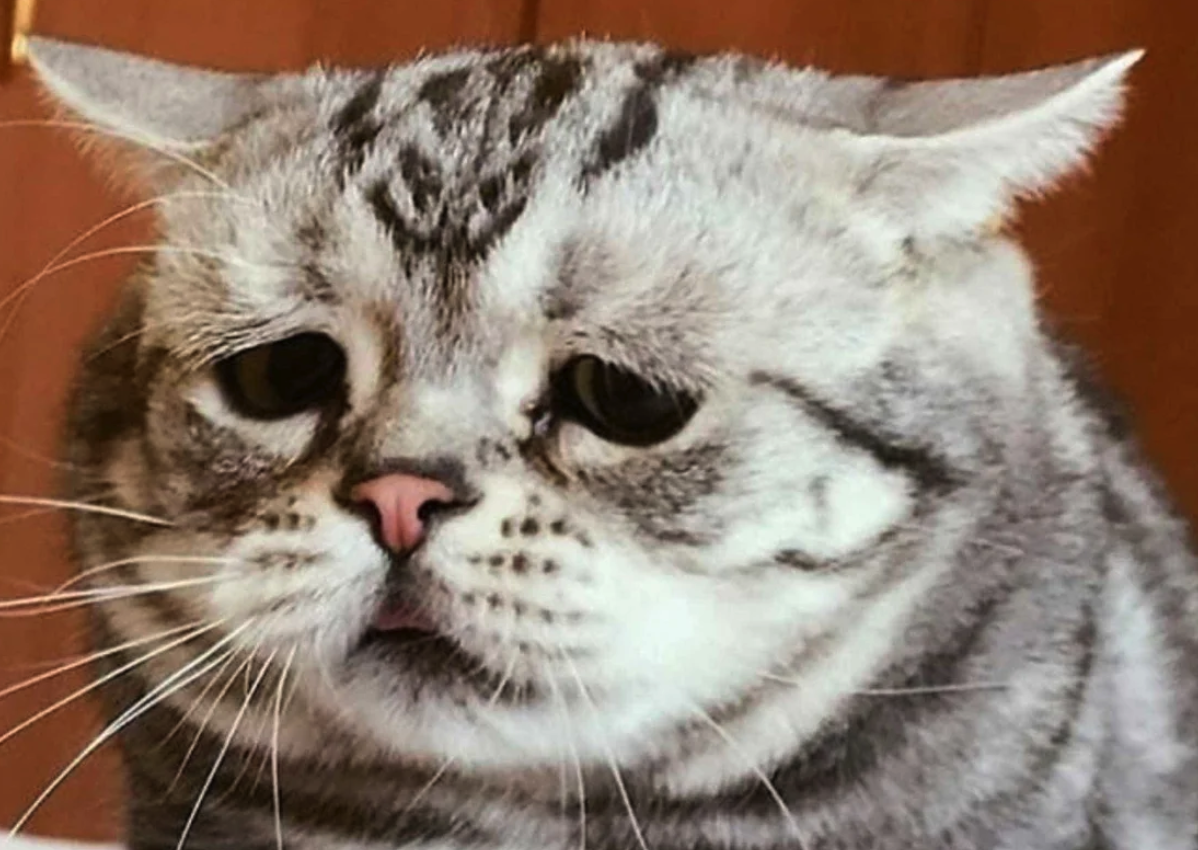